In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from tabulate import tabulate

mpl.style.use("fivethirtyeight")

## 1.

Let $\tilde{\theta}$ be the method of moments estimator (MME) for a parametric model with two parameters.
Denote by $\hat{F}$ the empirical distribution.
By definition,

$$
\begin{align*}
\mathbb{E}_{\tilde{\theta}}X & = \mathbb{E}_{\hat{F}}X \\
\mathbb{E}_{\tilde{\theta}}[X^{2}] & = \mathbb{E}_{\hat{F}}[X^{2}].
\end{align*}
$$

Squaring the first equation and subtracting it from the second, we can rewrite the above equivalently as

$$
\begin{align*}
\mathbb{E}_{\tilde{\theta}}X & =\mathbb{E}_{\hat{F}}X\\
\mathbb{V}_{\tilde{\theta}}X & =\mathbb{V}_{\hat{F}}X.
\end{align*}
$$

In the special case of the gamma distribution, $\tilde{\theta}=(\tilde{\alpha},\tilde{\beta})$ satisfies

$$
\begin{align*}
\tilde{\alpha}\tilde{\beta} & =\mathbb{E}_{\hat{F}}X\\
\tilde{\alpha}\tilde{\beta}^{2} & =\mathbb{V}_{\hat{F}}X
\end{align*}
$$

and hence 

$$
\begin{align*}
\tilde{\alpha} & =\frac{\left(\mathbb{E}_{\hat{F}}X\right)^{2}}{\mathbb{V}_{\hat{F}}X}\\
\tilde{\beta} & =\frac{\mathbb{V}_{\hat{F}}X}{\mathbb{E}_{\hat{F}}X}.
\end{align*}
$$

In [6]:
shape = 0.3
scale = 0.7

X = np.random.gamma(shape=shape, scale=scale, size=1_000_000)
mome_shape = X.mean()**2 / X.var()
mome_scale = X.var() / X.mean()

np.testing.assert_almost_equal(mome_shape, shape, decimal=2)
np.testing.assert_almost_equal(mome_scale, scale, decimal=2)

## 2.

(a) Let $\tilde{\theta}=(\tilde{a},\tilde{b})$ be the MME. Then,

$$
\begin{align*}
\frac{\tilde{a}+\tilde{b}}{2} & =\mathbb{E}_{\hat{F}}X\\
\frac{1}{12}\left(\tilde{b}-\tilde{a}\right)^{2} & =\mathbb{V}_{\hat{F}}X.
\end{align*}
$$

Let $\tilde{c}=\tilde{b}-\tilde{a}$ so that

$$
\tilde{c}=2\sqrt{3}\operatorname{Std}_{\hat{F}}X.
$$

Since $\tilde{a}+\tilde{b}=2\tilde{a}+\tilde{c}$ and $\tilde{a}+\tilde{b}=2\tilde{b}-\tilde{c}$,

$$
\begin{align*}
\tilde{a} & =\mathbb{E}_{\hat{F}}X-\sqrt{3}\operatorname{Std}_{\hat{F}}X\\
\tilde{b} & =\mathbb{E}_{\hat{F}}X+\sqrt{3}\operatorname{Std}_{\hat{F}}X.
\end{align*}
$$

In [7]:
a = 0.3
b = 1.2

X = np.random.uniform(low=a, high=b, size=1_000_000)
mome_a = X.mean() - np.sqrt(3) * X.std()
mome_b = X.mean() + np.sqrt(3) * X.std()

np.testing.assert_almost_equal(mome_a, a, decimal=2)
np.testing.assert_almost_equal(mome_b, b, decimal=2)

(b) The likelihood is

$$
\mathcal{L}(a,b)
=\prod_{n}f_{a,b}(X_{n})
=\frac{1}{\left(b-a\right)^{N}}\prod_{n}I_{(a, b)}(X_{n})
$$

and hence the MLE is

$$
\begin{align*}
\hat{a} & =\min_{n}X_{n}\\
\hat{b} & =\max_{n}X_{n}.
\end{align*}
$$

(c) By equivariance, the MLE of $\tau=(a+b)/2$ is $\hat{\tau}=(\hat{a}+\hat{b})/2$.

(d) The nonparametric plug-in estimator $\tilde{\tau}$ of $\tau$ is the sample mean.
Since this estimator is unbiased,

$$
\operatorname{MSE}\tilde{\tau}
=\mathbb{V}\tilde{\tau}
=\frac{1}{n}\mathbb{V}X_{1}
=\frac{1}{12n}\left(b-a\right)^{2}.
$$

In [5]:
n = 10
b = 3
a = 1
confidence = 0.95

sample_mean_mse = (b - a)**2 / (12. * n)

X = np.random.uniform(low=a, high=b, size=(1_000_000, n))
τ = (a + b) / 2.
mle = (X.min(axis=1) + X.max(axis=1)) / 2.
mle_squared_error = ((mle - τ)**2)
mle_mse = mle_squared_error.mean()

tabulate(
    [
        ["Nonparametric plug-in estimator", sample_mean_mse],
        ["MLE", mle_mse]
    ],
    headers=("Estimator", "MSE"),
    tablefmt="html",
)

'<table>\n<thead>\n<tr><th>Estimator                      </th><th style="text-align: right;">      MSE</th></tr>\n</thead>\n<tbody>\n<tr><td>Nonparametric plug-in estimator</td><td style="text-align: right;">0.0333333</td></tr>\n<tr><td>MLE                            </td><td style="text-align: right;">0.0151677</td></tr>\n</tbody>\n</table>'

## 3.

(a) Let $Z$ be a standard normal random variable and $\Phi$ be its CDF.
Then,

$$
0.95=\mathbb{P}(X<\tau)=\mathbb{P}(Z<\left(\tau-\mu\right)/\sigma)=F_{Z}(\left(\tau-\mu\right)/\sigma).
$$

Therefore, defining

$$
g(\mu,\sigma)=\Phi^{-1}(0.95)\sigma+\mu,
$$

we have that $\tau=g(\mu,\sigma)$.
The MLE for the mean and standard deviation of a normal distribution are

$$
\begin{align*}
\hat{\mu}&=\mathbb{E}_{\hat{F}}X \\
\hat{\sigma}&=\operatorname{Std}_{\hat{F}}X.
\end{align*}
$$

By equivariance, the MLE for $\tau$ is $\hat{\tau}=g(\hat{\mu},\hat{\sigma})$.

(b) Since $\hat{\tau}$ is an MLE,

$$
\frac{\hat{\tau}-\tau}{\operatorname{se}(\hat{\tau})}\rightsquigarrow N(0,1).
$$

Since

$$
\nabla g=\begin{pmatrix}1\\
\Phi^{-1}(0.95)
\end{pmatrix},
$$

the multiparameter delta method yields

$$
\begin{align*}
\operatorname{se}(\hat{\tau}) & =\sqrt{\begin{pmatrix}1\\
\Phi^{-1}(0.95)
\end{pmatrix}^{\intercal}\frac{1}{n}\begin{pmatrix}\sigma^{2}\\
 & \frac{\sigma^{2}}{2}
\end{pmatrix}\begin{pmatrix}1\\
\Phi^{-1}(0.95)
\end{pmatrix}}\\
 & =\sigma\sqrt{\frac{1}{n}+\frac{1}{2n}\Phi^{-1}(0.95)^{2}}.
\end{align*}
$$

An approximate $1-\alpha$ confidence interval is $\hat{\tau}\pm z_{\alpha/2}\cdot\widehat{\operatorname{se}}(\hat{\tau})$ where $z_{\alpha/2}=\Phi^{-1}(1-\alpha/2)$.

(c)

In [4]:
X = np.array([3.23, -2.50,  1.88, -0.68,  4.43, 0.17,
              1.03, -0.07, -0.01,  0.76,  1.76, 3.18,
              0.33, -0.31,  0.30, -0.61,  1.52, 5.43,
              1.54,  2.28,  0.42,  2.33, -1.03, 4.00,
              0.39])

In [7]:
mle_τ = scipy.stats.norm.ppf(0.95) * X.std() + X.mean()
mle_τ

4.180410658803283

In [8]:
delta_method_se = X.std() * np.sqrt((1. + 0.5 * scipy.stats.norm.ppf(0.95)**2) / X.size)

bootstrap_X = X.std() * np.random.randn(1_000_000, X.size) + X.mean()
bootstrap_se = (scipy.stats.norm.ppf(0.95) * bootstrap_X.std(axis=1) + bootstrap_X.mean(axis=1)).std()

tabulate(
    [
        ["Delta Method", delta_method_se],
        ["Parametric Bootstrap", bootstrap_se]
    ],
    headers=("Estimator", "SE"),
    tablefmt="html",
)

'<table>\n<thead>\n<tr><th>Estimator           </th><th style="text-align: right;">      SE</th></tr>\n</thead>\n<tbody>\n<tr><td>Delta Method        </td><td style="text-align: right;">0.55758 </td></tr>\n<tr><td>Parametric Bootstrap</td><td style="text-align: right;">0.555842</td></tr>\n</tbody>\n</table>'

## 4.

By our findings in Question 2 Part (b), the MLE for $\theta$ is $\hat{\theta}=\max_{i}X_{i}$.
Since $F_{\hat{\theta}}(\theta+\epsilon)=1$,

$$
\mathbb{P}(\left|\hat{\theta}-\theta\right|>\epsilon)=1-\mathbb{P}(\theta-\epsilon\leq\hat{\theta}\leq\theta+\epsilon)=1-F_{\hat{\theta}}(\theta+\epsilon)+F_{\hat{\theta}}(\theta-\epsilon)=F_{\hat{\theta}}(\theta-\epsilon).
$$

Since $F_{\hat{\theta}}=F_{X_{1}}^{n}$ and $F_{X_{1}}(\theta-\epsilon)<1$,
it follows that the above converges to zero as $n\rightarrow\infty$.

## 5.

The score function for the Poisson density is
$$
s(X;\lambda)=\frac{\partial\log f(X;\lambda)}{\partial\lambda}=\frac{\partial}{\partial\lambda}\left[X\log\lambda-\lambda-\log(X!)\right]=\frac{X}{\lambda}-1.
$$
It follows that the derivative of the log-likelihood $\ell$ is
$$
\ell^{\prime}(\lambda)=\sum_{i}s(X_{i};\lambda)=-n+\frac{1}{\lambda}\sum_{i}X_{i}.
$$
Therefore, the MLE is
$$
\hat{\lambda}=\frac{1}{n}\sum_{i}X_{i}.
$$
This happens to be the same as the MME since $\mathbb{E}X_{1}=\lambda$.
The Fisher information is
$$
I_{n}(\lambda)=nI(\lambda)=n\mathbb{V}(s(X_{1};\lambda))=\frac{n}{\lambda}.
$$

## 6.

a) The MLE for $\theta$ is 
$$
\hat{\theta}=\frac{1}{n}\sum_{i}X_{i}.
$$
Denoting by $\Phi$ the standard normal CDF,
$$
\psi=\mathbb{P}(Y_{1}=1)=\mathbb{P}(X_{1}>0)=\mathbb{P}(Z>-\theta)=\Phi(\theta).
$$
It follows, by the equivariance of the MLE, that $\hat{\psi}=\Phi(\hat{\theta})$ is an MLE for $\psi$.

b) Let $\varphi$ denote the normal PDF. By the delta method,
$$
\operatorname{se}(\hat{\psi})
=\left|\varphi(\theta)\right|\operatorname{se}(\hat{\theta})
=\left|\varphi(\theta)\right|\sqrt{\frac{1}{n}}.
$$
and hence $\hat{\psi}\pm2\widehat{\operatorname{se}}(\hat{\psi})$ is a 95\% confidence interval for $\psi$.

c) By the LLN, $\tilde{\psi}=(1/n)\sum_{i}Y_{i}$ converges in probability to $\mathbb{E}Y_{1}=\mathbb{P}(X_{1}>0)$.

d) The asymptotic relative efficiency is
$$
\operatorname{ARE}(\tilde{\psi},\hat{\psi})=\frac{\operatorname{se}(\hat{\psi})^{2}}{\operatorname{se}(\tilde{\psi})^{2}}=\frac{\frac{1}{n}\varphi(\theta)^{2}}{\frac{1}{n}\psi\left(1-\psi\right)}=\frac{\varphi(\theta)^{2}}{\psi\left(1-\psi\right)}.
$$
It's possible to show that the ARE achieves its maximum value of $2/\pi\approx0.637$ at $\theta=0$.
Note that the ARE is necessarily less than one due to the asymptotic optimality of the MLE (Theorem 9.23).
The interpretation is that we lose information by basing our estimate on $Y_i$ instead of $X_i$.

e) If the data is not normal, then $\hat{\theta}\xrightarrow{P}\mathbb{E}X_{1}$ by the LLN
and hence $\hat{\psi}\xrightarrow{P}\Phi(\mathbb{E}X_{1})$.

## 7.

a) By equivariance, the MLE is $\hat{\psi} = \hat{p}_1 - \hat{p}_2$.

b) The log-likelihood is

$$
\ell(p_{1},p_{2})=\sum_{i=1}^2\log\binom{n_{i}}{X_{i}}+X_{i}\log p_{i}+\left(n_{i}-X_{i}\right)\log(1-p_{i}).
$$

The cross-derivatives are zero:

$$
\frac{\partial^2 \ell}{\partial p_{1}\partial p_{2}}=0.
$$

Moreover,

$$
\frac{\partial^{2}\ell}{\partial p_{i}^{2}}=-\frac{X_{i}}{p_{i}^{2}}-\frac{n_{i}-X_{i}}{\left(1-p_{i}\right)^{2}}
$$

and hence

$$
\mathbb{E}\left[\frac{\partial^{2}\ell}{\partial p_{i}^{2}}\right]=-\frac{n_{i}}{p_{i}\left(1-p_{i}\right)}.
$$

It follows that the Fisher information matrix is

$$
I(p_{1},p_{2})=\begin{pmatrix}\frac{n_{1}}{p_{1}\left(1-p_{1}\right)}\\
 & \frac{n_{2}}{p_{2}\left(1-p_{2}\right)}
\end{pmatrix}.
$$

c) Let $g(p_{1},p_{2})=p_{1}-p_{2}$. Then, $\nabla g=(1,-1)^{\intercal}$.
It follows that

$$
\operatorname{se}(\hat{\psi})=\sqrt{\nabla g^{\intercal}I(p_{1},p_{2})^{-1}\nabla g}=\sqrt{\frac{p_{1}\left(1-p_{1}\right)}{n_{1}}+\frac{p_{2}\left(1-p_{2}\right)}{n_{2}}}.
$$

'<table>\n<thead>\n<tr><th>Method              </th><th style="text-align: right;">  90% CI Lower Bound</th><th style="text-align: right;">  90% CI Upper Bound</th></tr>\n</thead>\n<tbody>\n<tr><td>Delta Method        </td><td style="text-align: right;">         -0.00884094</td><td style="text-align: right;">            0.128841</td></tr>\n<tr><td>Parametric Bootstrap</td><td style="text-align: right;">         -0.01      </td><td style="text-align: right;">            0.13    </td></tr>\n</tbody>\n</table>'

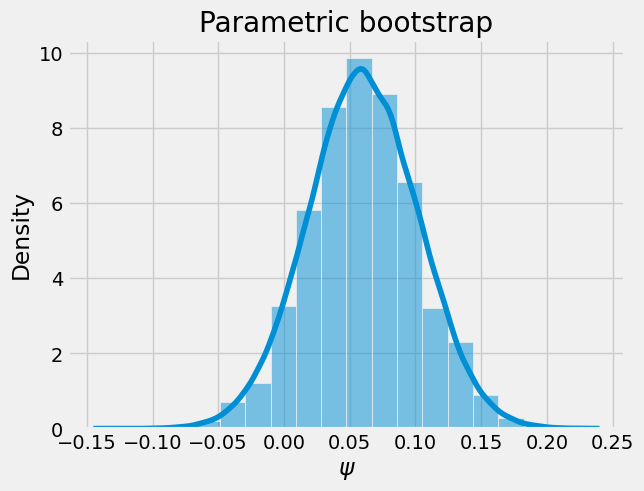

In [24]:
n1 = 200
n2 = 200
X1 = 160
X2 = 148
n_bootstrap_samples = 100_000
level = 0.90

p1_hat = X1 / n1
p2_hat = X2 / n2 
ψ_hat = p1_hat - p2_hat

se_delta_method = np.sqrt(p1_hat * (1. - p1_hat) / n1 + p2_hat * (1. - p2_hat) / n2)

np.random.seed(1)
X1_bootstrap = np.random.binomial(200, p1_hat, size=(n_bootstrap_samples, ))
X2_bootstrap = np.random.binomial(200, p2_hat, size=(n_bootstrap_samples, ))
ψ_bootstrap = X1_bootstrap / n1 - X2_bootstrap / n2

sns.histplot(x=ψ_bootstrap, bins=20, kde=True, stat="density")
plt.title("Parametric bootstrap")
plt.xlabel(r"$\psi$")

tabulate(
    [
        ["Delta Method", ψ_hat - 1.64 * se_delta_method, ψ_hat + 1.64 * se_delta_method],
        ["Parametric Bootstrap", np.quantile(ψ_bootstrap, 0.05), np.quantile(ψ_bootstrap, 0.95)]
    ],
    headers=("Method", "90% CI Lower Bound", "90% CI Upper Bound"),
    tablefmt="html",
)

In [23]:
scipy.stats.norm.ppf(0.95)

1.6448536269514722

## 8.

First, note that the log-likehood is

$$
\ell(\mu,\sigma)=-n\log\sigma-\frac{1}{2\sigma^{2}}\sum_{i}\left(X_{i}-\mu\right)^{2}.
$$

It follows that

$$
\begin{align*}
\mathbb{E}\left[\frac{\partial^{2}\ell}{\partial\mu^{2}}\right] & =\mathbb{E}\left[-\frac{n}{\sigma^{2}}\right]=-\frac{n}{\sigma^{2}}\\
\mathbb{E}\left[\frac{\partial^{2}\ell}{\partial\sigma^{2}}\right] & =\mathbb{E}\left[\frac{n}{\sigma^{2}}-\frac{3}{\sigma^{4}}\sum_{i}\left(X_{i}-\mu\right)^{2}\right]=-\frac{2n}{\sigma^{2}}\\
\mathbb{E}\left[\frac{\partial\ell}{\partial\mu\partial\sigma}\right] & =\mathbb{E}\left[-\frac{2}{\sigma^{3}}\sum_{i}\left(X_{i}-\mu\right)\right]=0.
\end{align*}
$$

Therefore,

$$
I(\mu,\sigma)=\begin{pmatrix}\frac{n}{\sigma^{2}}\\
 & \frac{2n}{\sigma^{2}}
\end{pmatrix}.
$$

## 9.

See Chapter 8 exercises.

## 10.

a) See Chapter 8 exercises.

b) In the parametric bootstrap,

$$
\mathbb{P}(\hat{\theta}^{*}=\hat{\theta})=\mathbb{E}\left[I(\hat{\theta}^{*}=\hat{\theta})\right]=\mathbb{E}\left[\mathbb{E}\left[I(\hat{\theta}^{*}=\hat{\theta})\middle|\hat{\theta}\right]\right]=\mathbb{E}0=0.
$$

In the nonparametric bootstrap,

$$
\mathbb{P}(\hat{\theta}^{*}=\hat{\theta})=1-\mathbb{P}(\hat{\theta}^{*}\neq\hat{\theta})=1-\left(\frac{n-1}{n}\right)^{n}
$$

since $X_{i}\neq X_{j}$ for $i\neq j$ a.s.
Taking limits in the above yields

$$
\mathbb{P}(\hat{\theta}^{*}=\hat{\theta})\rightarrow1-1/e\approx0.632.
$$